# Examples of optimizing Rosenbrock's Valley

In [1]:
from mango.tuner import Tuner

In [2]:
param_dict = {
        'x': range(-10, 10),
        'y': range(-10, 10),
    }

a = 1
b = 20
x_opt = a
y_opt = a**2

In [3]:
def objfunc(args_list):
        results = []
        for hyper_par in args_list:
            x = hyper_par['x']
            y = hyper_par['y']
            result = -(b*((y - x**2)**2) + ((a - x)**2))
            results.append(result)
        return results

In [4]:
conf_Dict = dict()
conf_Dict['batch_size'] = 5
conf_Dict['num_iteration'] = 40
conf_Dict['domain_size'] = 10000

In [5]:
tuner = Tuner(param_dict, objfunc,conf_Dict)
results = tuner.run()

In [6]:
print('best parameters:',results['best_hyper_parameter'])
print('best objective:',results['best_objective'])

best parameters: {'x': -1, 'y': 1}
best objective: -4


In [7]:
print("Real x_opt and y_opt are:",x_opt,y_opt)

Real x_opt and y_opt are: 1 1


# Plotting the actual variation in objective values of the tried results

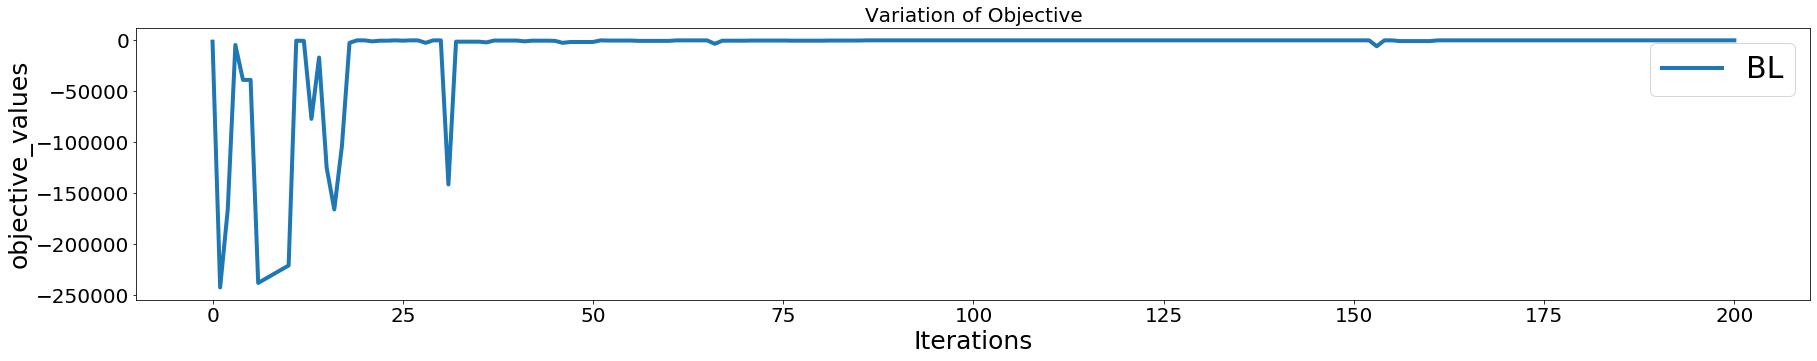

In [9]:
Size = 2000

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation of Max objective values of the tried results

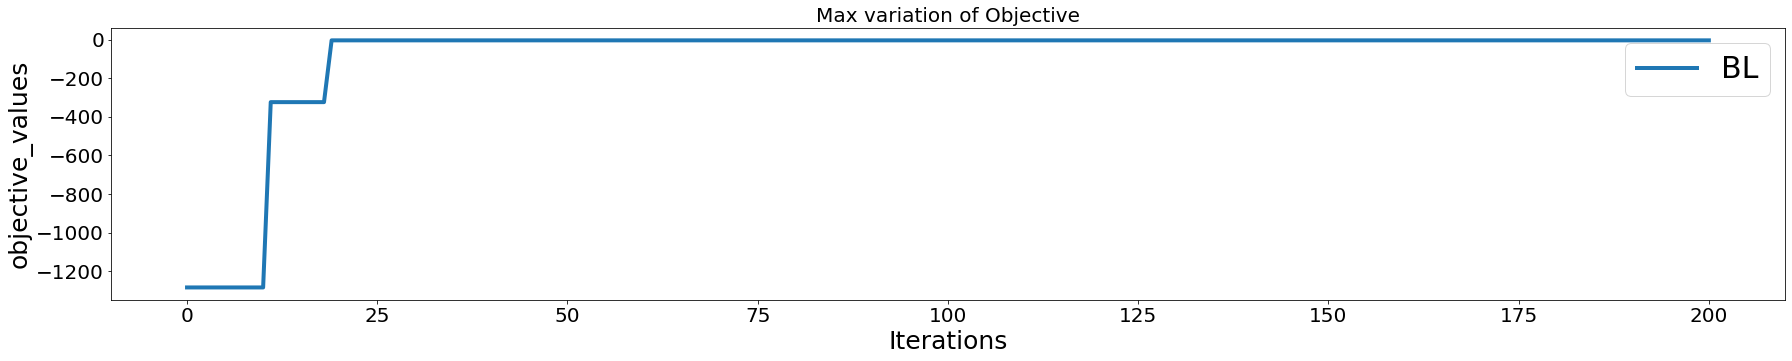

In [10]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()